##数据探探
首先看看数据长啥样

In [2]:
import pandas as pd;
import numpy as np
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
train_df=pd.read_csv("./input_data/train.csv")
test_df=pd.read_csv("./input_data/test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [6]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


数据拼接一把

In [7]:
test_df["casual"]=0;
test_df["registered"]=0;
test_df["count"]=0;
test_df["traintest"]='test';
train_df["traintest"]='train';

In [8]:
all_df=pd.concat((train_df,test_df))

In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 13 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
traintest     17379 non-null object
dtypes: float64(3), int64(8), object(2)
memory usage: 1.9+ MB


In [10]:
all_df["date"] = all_df.datetime.apply(lambda x : x.split()[0])

In [11]:
all_df["month"] = all_df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [12]:
all_df["monthnum"] = all_df.datetime.apply(lambda x : int(x.split()[0].split('-')[1]))

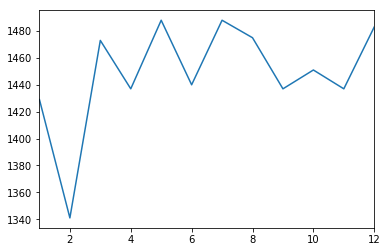

In [13]:
all_df.monthnum.value_counts().sort_index().plot(kind='line')

In [14]:
all_df["daynum"]=all_df.datetime.apply(lambda x : int(x.split()[0].split('-')[2]))

In [15]:
all_df["hour"] = all_df.datetime.apply(lambda x : int(x.split()[1].split(":")[0]))

In [16]:
all_df["weekday"] = all_df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 19 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
traintest     17379 non-null object
date          17379 non-null object
month         17379 non-null object
monthnum      17379 non-null int64
daynum        17379 non-null int64
hour          17379 non-null int64
weekday       17379 non-null object
dtypes: float64(3), int64(11), object(5)
memory usage: 2.7+ MB


根据小时进行切分

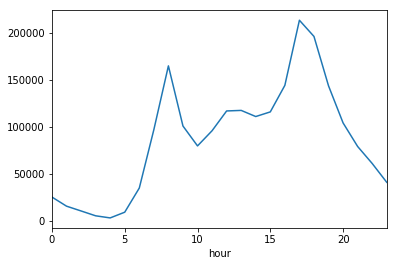

In [18]:
all_df.groupby('hour').sum()['count'].sort_index().plot(kind='line')

In [19]:
def hour_section(hour):
    if hour>=0 and hour<=6:
        return 0
    elif hour>=7 and hour<=10:
        return 1
    elif hour>=11 and hour<=15:
        return 2
    elif hour>=16 and hour<=20:
        return 3
    else :return 4

In [20]:
all_df["hour_section"]=all_df.hour.apply(hour_section)

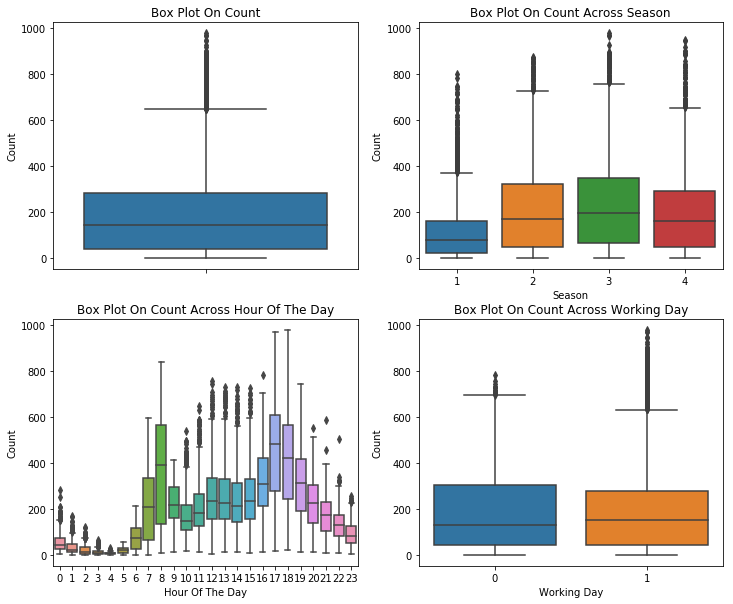

In [30]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=all_df.loc[all_df.traintest=='train'],y="count",ax=axes[0][0])
sn.boxplot(data=all_df.loc[all_df.traintest=='train'],y="count",x="season",ax=axes[0][1])
sn.boxplot(data=all_df.loc[all_df.traintest=='train'],y="count",x="hour",ax=axes[1][0])
sn.boxplot(data=all_df.loc[all_df.traintest=='train'],y="count",x="workingday",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")a

In [27]:
all_df.loc[all_df.traintest=='train'].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,monthnum,daynum,hour,hour_section
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,9.992559,11.541613,1.716884
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,5.476608,6.915838,1.397400
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,5.000000,6.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,10.000000,12.000000,2.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,15.000000,18.000000,3.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,19.000000,23.000000,4.000000


In [47]:
outliers=np.abs(all_df.loc[all_df.traintest=='train',["count"]]-all_df.loc[all_df.traintest=='train',["count"]].mean()) >(3*all_df.loc[all_df.traintest=='train',["count"]].std())

In [58]:
len(all_df.loc[all_df.traintest=='train'][outliers['count'].values])

147

In [60]:
goodpoints=np.abs(all_df.loc[all_df.traintest=='train',["count"]]-all_df.loc[all_df.traintest=='train',["count"]].mean()) <=(3*all_df.loc[all_df.traintest=='train',["count"]].std())

In [61]:
len(all_df.loc[all_df.traintest=='train'][goodpoints['count'].values])

10739

In [62]:
all_df=pd.concat((all_df.loc[all_df.traintest=='train'][goodpoints['count'].values],all_df.loc[all_df.traintest=='test']))

In [70]:
all_df.traintest.value_counts()

train    10739
test      6493
Name: traintest, dtype: int64

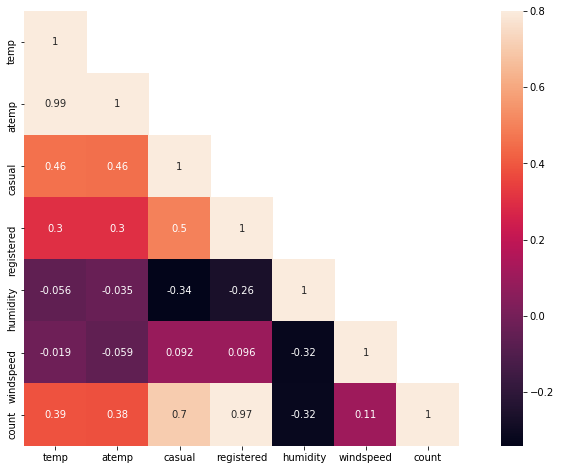

In [75]:
corrMatt = all_df.loc[all_df.traintest=='train',["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

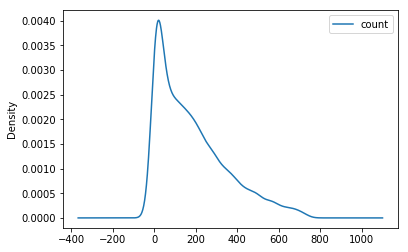

In [80]:
all_df.loc[all_df.traintest=='train',["count"]].plot(kind='kde')

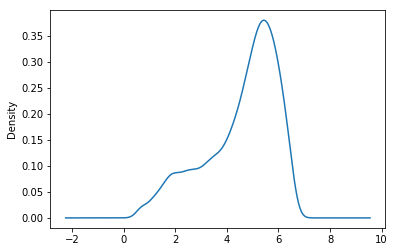

In [85]:
import math
all_df.loc[all_df.traintest=='train',["count"]]['count'].apply(lambda x: math.log(1+x)).plot(kind='kde')

In [87]:
all_df['count_log']=all_df['count'].apply(lambda x: math.log(1+x))

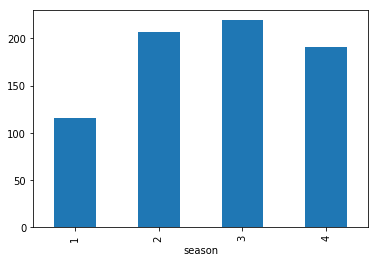

In [96]:
all_df.loc[all_df.traintest=='train'].groupby(['season'])['count'].mean().plot(kind='bar')

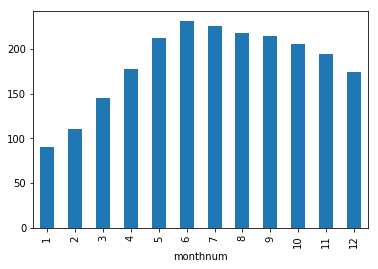

In [100]:
all_df.loc[all_df.traintest=='train'].groupby(['monthnum'])['count'].mean().plot(kind='bar')

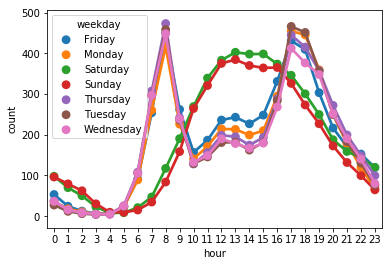

In [113]:
hourAggregated = pd.DataFrame(all_df.loc[all_df.traintest=='train'].groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"], data=hourAggregated, join=True)

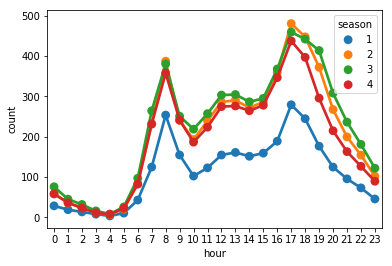

In [112]:
hourAggregated = pd.DataFrame(all_df.loc[all_df.traintest=='train'].groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True)

In [121]:
def hour_section(hour,weekday):
    if weekday not in ['Saturday','Sunday']:
        if hour>=0 and hour<=6:
            return 0
        elif hour>=7 and hour<=10:
            return 1
        elif hour>=11 and hour<=15:
            return 2
        elif hour>=16 and hour<=20:
            return 3
        else :return 4
    else:
        if hour>=0 and hour <=8 :
            return 5
        elif hour >=9 and hour <=20:
            return 6
        else: return 7
    

In [124]:
all_df['hour_week_section']=all_df.apply(lambda row: hour_section(row['hour'], row['weekday']), axis=1)

In [127]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17232 entries, 0 to 6492
Data columns (total 22 columns):
datetime             17232 non-null object
season               17232 non-null int64
holiday              17232 non-null int64
workingday           17232 non-null int64
weather              17232 non-null int64
temp                 17232 non-null float64
atemp                17232 non-null float64
humidity             17232 non-null int64
windspeed            17232 non-null float64
casual               17232 non-null int64
registered           17232 non-null int64
count                17232 non-null int64
traintest            17232 non-null object
date                 17232 non-null object
month                17232 non-null object
monthnum             17232 non-null int64
daynum               17232 non-null int64
hour                 17232 non-null int64
weekday              17232 non-null object
hour_section         17232 non-null int64
count_log            17232 non-null float

In [128]:
all_df.holiday.value_counts()

0    16732
1      500
Name: holiday, dtype: int64

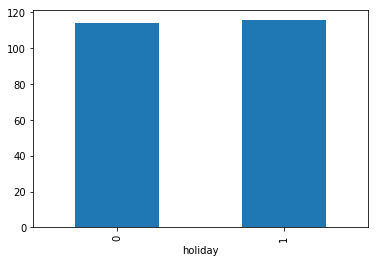

In [132]:
all_df.groupby('holiday')['count'].mean().plot(kind='bar')

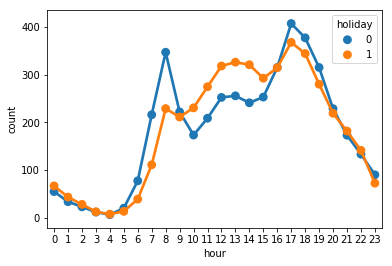

In [133]:
hourAggregated = pd.DataFrame(all_df.loc[all_df.traintest=='train'].groupby(["hour","holiday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["holiday"], data=hourAggregated, join=True)

In [134]:
all_df.workingday.value_counts()

1    11721
0     5511
Name: workingday, dtype: int64

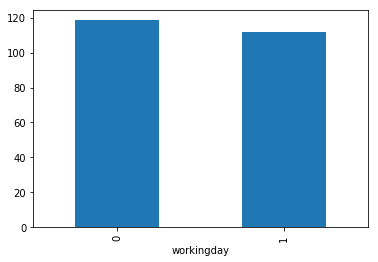

In [135]:
all_df.groupby('workingday')['count'].mean().plot(kind='bar')

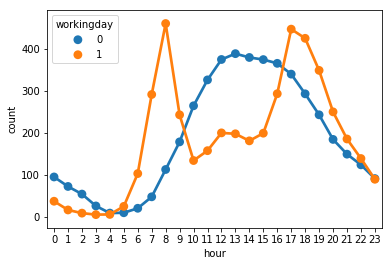

In [136]:
hourAggregated = pd.DataFrame(all_df.loc[all_df.traintest=='train'].groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["workingday"], data=hourAggregated, join=True)

In [144]:
def hour_workingday(hour,workingday):
    return str(hour)+"_"+str(workingday)

In [149]:
all_df['hour_workingday']=all_df.apply(lambda row: hour_workingday(row['hour'], row['workingday']), axis=1)

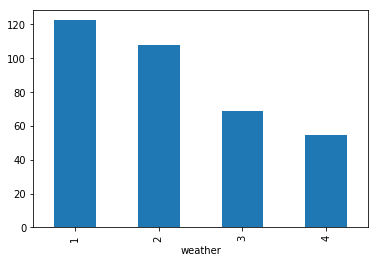

In [154]:
all_df.groupby('weather')['count'].mean().plot(kind='bar')

In [156]:
all_df[['temp','count']].corr()

,temp,count
temp,1.000000,0.232276
count,0.232276,1.000000


In [161]:
all_df['temp_int']=all_df.temp.apply(lambda x: int(x));

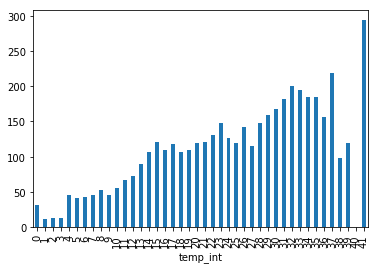

In [166]:
all_df.groupby('temp_int')['count'].mean().plot(kind='bar')

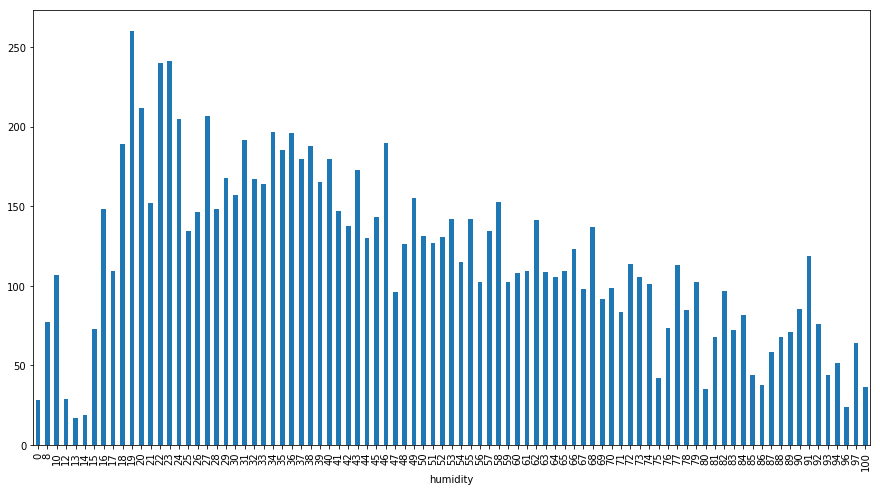

In [186]:
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
pd.DataFrame({'humidity':all_df.humidity.apply(lambda x: int(x)),'count':all_df['count']}).groupby('humidity')['count'].mean().plot(kind='bar')

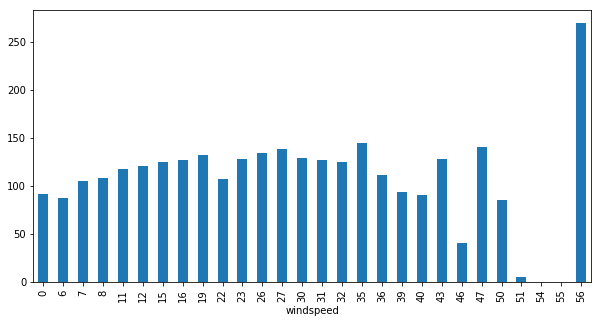

In [188]:
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
pd.DataFrame({'windspeed':all_df.windspeed.apply(lambda x: int(x)),'count':all_df['count']}).groupby('windspeed')['count'].mean().plot(kind='bar')

In [191]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

根据题意：定义一下损失函数

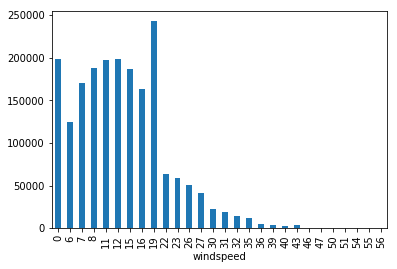

In [192]:
pd.DataFrame({'windspeed':all_df.windspeed.apply(lambda x: int(x)),'count':all_df['count']}).groupby('windspeed')['count'].sum().plot(kind='bar')

做完这些分析，准备做特征工程，比如归一化，缺失值填充，构造新的特征等。

In [194]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17232 entries, 0 to 6492
Data columns (total 24 columns):
datetime             17232 non-null object
season               17232 non-null int64
holiday              17232 non-null int64
workingday           17232 non-null int64
weather              17232 non-null int64
temp                 17232 non-null float64
atemp                17232 non-null float64
humidity             17232 non-null int64
windspeed            17232 non-null float64
casual               17232 non-null int64
registered           17232 non-null int64
count                17232 non-null int64
traintest            17232 non-null object
date                 17232 non-null object
month                17232 non-null object
monthnum             17232 non-null int64
daynum               17232 non-null int64
hour                 17232 non-null int64
weekday              17232 non-null object
hour_section         17232 non-null int64
count_log            17232 non-null float

In [195]:
all_df=pd.get_dummies(all_df,columns=['season'])

In [201]:
all_df=pd.get_dummies(all_df,columns=['weather'])

In [206]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
temp_scale_param = scaler.fit(all_df[['temp']])
all_df['temp_scaled'] = scaler.fit_transform(all_df[['temp']], temp_scale_param)

In [210]:
scaler = preprocessing.StandardScaler()
atemp_scale_param = scaler.fit(all_df[['atemp']])
all_df['atemp_scaled'] = scaler.fit_transform(all_df[['atemp']], atemp_scale_param)

In [212]:
scaler = preprocessing.StandardScaler()
humidity_scale_param = scaler.fit(all_df[['humidity']])
all_df['humidity_scaled'] = scaler.fit_transform(all_df[['humidity']], atemp_scale_param)

In [213]:
scaler = preprocessing.StandardScaler()
humidity_scale_param = scaler.fit(all_df[['windspeed']])
all_df['windspeed_scaled'] = scaler.fit_transform(all_df[['windspeed']], atemp_scale_param)

In [241]:
import datetime
def date_diff(date):
    first_new_year=str(date[0:4])+"-01-01 00:00:00"
    next_new_year=str(int(date[0:4])+1)+"-01-01 00:00:00"
    
    date = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    first_new_year = datetime.datetime.strptime(first_new_year, '%Y-%m-%d %H:%M:%S')
    next_new_year = datetime.datetime.strptime(next_new_year, '%Y-%m-%d %H:%M:%S')
    if (abs((date-first_new_year).days)) > (abs ((date-next_new_year).days)):
        return (abs((date-next_new_year).days))
    else:return  (abs((date-first_new_year).days))

In [244]:
all_df['date_newyear_num']=all_df.datetime.apply(date_diff)

In [246]:
scaler = preprocessing.StandardScaler()
date_newyear_num_scale_param = scaler.fit(all_df[['date_newyear_num']])
all_df['date_newyear_num_scaled'] = scaler.fit_transform(all_df[['date_newyear_num']], date_newyear_num_scale_param)

In [248]:
all_df=pd.get_dummies(all_df,columns=['month'])

In [250]:
all_df=pd.get_dummies(all_df,columns=['hour'])

In [251]:
all_df=pd.get_dummies(all_df,columns=['weekday'])

In [252]:
all_df=pd.get_dummies(all_df,columns=['weekday'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17232 entries, 0 to 6492
Data columns (total 76 columns):
datetime                   17232 non-null object
holiday                    17232 non-null int64
workingday                 17232 non-null int64
temp                       17232 non-null float64
atemp                      17232 non-null float64
humidity                   17232 non-null int64
windspeed                  17232 non-null float64
casual                     17232 non-null int64
registered                 17232 non-null int64
count                      17232 non-null int64
traintest                  17232 non-null object
date                       17232 non-null object
monthnum                   17232 non-null int64
daynum                     17232 non-null int64
hour_section               17232 non-null int64
count_log                  17232 non-null float64
hour_week_section          17232 non-null int64
hour_workingday            17232 non-null object
temp_int        

In [258]:
all_df=pd.get_dummies(all_df,columns=['hour_workingday'])

In [267]:
all_df=pd.get_dummies(all_df,columns=['hour_week_section'])

In [268]:
all_df.columns.values

array(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'traintest', 'date',
       'monthnum', 'daynum', 'hour_section', 'count_log', 'temp_int',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'temp_scaled',
       'atemp_scaled', 'humidity_scaled', 'windspeed_scaled',
       'date_newyear_num', 'date_newyear_num_scaled', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'weekday_Friday', 'weekday_Monday'

In [269]:
all_df.to_csv("feature_engine.csv")

In [270]:
feature_columns=['holiday', 'workingday', 
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'temp_scaled',
       'atemp_scaled', 'humidity_scaled', 'windspeed_scaled',
       'date_newyear_num', 'date_newyear_num_scaled', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'hour_workingday_0_0', 'hour_workingday_0_1',
       'hour_workingday_10_0', 'hour_workingday_10_1',
       'hour_workingday_11_0', 'hour_workingday_11_1',
       'hour_workingday_12_0', 'hour_workingday_12_1',
       'hour_workingday_13_0', 'hour_workingday_13_1',
       'hour_workingday_14_0', 'hour_workingday_14_1',
       'hour_workingday_15_0', 'hour_workingday_15_1',
       'hour_workingday_16_0', 'hour_workingday_16_1',
       'hour_workingday_17_0', 'hour_workingday_17_1',
       'hour_workingday_18_0', 'hour_workingday_18_1',
       'hour_workingday_19_0', 'hour_workingday_19_1',
       'hour_workingday_1_0', 'hour_workingday_1_1',
       'hour_workingday_20_0', 'hour_workingday_20_1',
       'hour_workingday_21_0', 'hour_workingday_21_1',
       'hour_workingday_22_0', 'hour_workingday_22_1',
       'hour_workingday_23_0', 'hour_workingday_23_1',
       'hour_workingday_2_0', 'hour_workingday_2_1', 'hour_workingday_3_0',
       'hour_workingday_3_1', 'hour_workingday_4_0', 'hour_workingday_4_1',
       'hour_workingday_5_0', 'hour_workingday_5_1', 'hour_workingday_6_0',
       'hour_workingday_6_1', 'hour_workingday_7_0', 'hour_workingday_7_1',
       'hour_workingday_8_0', 'hour_workingday_8_1', 'hour_workingday_9_0',
       'hour_workingday_9_1', 'hour_week_section_0', 'hour_week_section_1',
       'hour_week_section_2', 'hour_week_section_3', 'hour_week_section_4',
       'hour_week_section_5', 'hour_week_section_6', 'hour_week_section_7']

In [294]:
X=all_df.loc[all_df.traintest=='train',feature_columns].values
y_casual=all_df.loc[all_df.traintest=='train'].casual.apply(lambda x: np.log1p(x)).values
y_regstered=all_df.loc[all_df.traintest=='train'].registered.apply(lambda x: np.log1p(x)).values
y_all=all_df.loc[all_df.traintest=='train','count'].apply(lambda x: np.log1p(x)).values
X_test=all_df.loc[all_df.traintest=='test',feature_columns].values
X_date=all_df.loc[all_df.traintest=='test','datetime'].values

In [288]:
all_df.loc[all_df.traintest=='train',feature_columns].to_csv("X.csv")

In [289]:
all_df.loc[all_df.traintest=='train'].casual.apply(lambda x: np.log1p(x)).to_csv("y_casual.csv")

In [290]:
all_df.loc[all_df.traintest=='train'].registered.apply(lambda x: np.log1p(x)).to_csv("y_regstered.csv")

In [291]:
all_df.loc[all_df.traintest=='train','count'].apply(lambda x: np.log1p(x)).to_csv("y_all.csv")

In [292]:
all_df.loc[all_df.traintest=='test',feature_columns].to_csv("X_test.csv")

In [293]:
all_df.loc[all_df.traintest=='test','datetime'].to_csv("X_date.csv")

先用随机森林试试回归效果

In [300]:
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10, n_jobs=1,
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [299]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

from tqdm import *
parameters = {  
    "n_estimators": [100,500,1000,2000,3000,10000],  
    #"max_depth":[5],
    #"min_samples_leaf": [1],  
    #"min_samples_split": [5],
    #"max_features":["sqrt"]
}
estimator = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
gsearch = GridSearchCV(estimator, param_grid=parameters, scoring='', cv=10)
gsearch.fit(X=X,y=y_casual)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

NameError: name 'RandomForestRegressor' is not defined